<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Insurance Claim Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement
A key challenge for the insurance industry is to charge each customer an appropriate premium for the risk they represent. The ability to predict a correct claim amount has a significant impact on insurer's management decisions and financial statements. Predicting the cost of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of claims based on health factors like BMI, age, smoker, health conditions and others. Insurance companies apply numerous techniques for analyzing and predicting health insurance costs

## Data Definition
**claim: The amount claimed by the policyholder (Numeric) -- Target variable.**

**age** : Age of the policyholder (Numeric)

**sex:** Gender of policyholder (Categoric)

**weight:** Weight of the policyholder (Numeric)

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)

**no_of_dependents:** Number of dependent persons on the policyholder (Numeric)

**smoker:** Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)


**bloodpressure:** Bloodpressure reading of policyholder (Numeric)

**diabetes:** Indicates policyholder suffers from diabetes or not (non-diabetic=0; diabetic=1) (Categoric)

**regular_ex:** A policyholder regularly excercises or not (no-excercise=0; excercise=1) (Categoric)

**job_title:** Job profile of the policyholder (Categoric)

**city:** The city in which the policyholder resides (Categoric)

**hereditary_diseases:**  A policyholder suffering from a hereditary diseases or not (Categoric)


## Import Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


#### 1. Read the dataset. Display the top 5 rows of the dataframe. (1m)


In [12]:
df=pd.read_csv('healthinsurance.csv')
df.head(5)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7



## 2. Data Analysis and Preparation. Understand the Dataset.


<a id='Data_Shape'></a>
#### 2.1 Data Dimensions. Print number of rows and columns. (1m)

In [13]:
df.shape

(15000, 13)

#### 2.1 Check Data Types of all the columns. (1m)


In [14]:
df. dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object

#### 2.2 Change the datatype to object for following columns : smoker, diabetes, regular_ex   (2m)

In [15]:
df[["smoker", "diabetes", "regular_ex"]] = df[["smoker", "diabetes", "regular_ex"]].astype(str)
dataType=df.dtypes

#### 2.3. Recheck the data types after the conversion.  (1m)

In [16]:
dataType

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                  object
city                    object
bloodpressure            int64
diabetes                object
regular_ex              object
job_title               object
claim                  float64
dtype: object

#### 2.4 Obtain 5 point Summary Statistics for the numerical variables. (1m)

In [17]:
df.describe()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,68.650133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,19.418515,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,64.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,71.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,80.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,122.000000,63770.400000


#### 2.5 Obtain summary For categorical features. (1m) 

In [18]:
df.describe(include='object')

,sex,hereditary_diseases,smoker,city,diabetes,regular_ex,job_title
count,15000,15000,15000,15000,15000,15000,15000
unique,2,10,2,91,2,2,35
top,female,NoDisease,0,NewOrleans,1,0,Student
freq,7652,13998,12028,302,11655,11638,1320


## 3 : Missing value analysis. 


#### 3.1 Check if any column contains missing Values. (2m)

In [19]:
df.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

#### 3.2 Find out the percentage of missing values. (2m)

In [20]:
df.isnull().sum()*100/len(df)

age                    2.640000
sex                    0.000000
weight                 0.000000
bmi                    6.373333
hereditary_diseases    0.000000
no_of_dependents       0.000000
smoker                 0.000000
city                   0.000000
bloodpressure          0.000000
diabetes               0.000000
regular_ex             0.000000
job_title              0.000000
claim                  0.000000
dtype: float64

#### 3.3 For age and bmi columns, fill the missing values with their respective means. (4m)

In [21]:
mean_value_age = df['age'].mean()
df['age'].fillna(value=mean_value_age, inplace=True)
mean_value_bmi = df['bmi'].mean()
df['bmi'].fillna(value=mean_value_bmi, inplace=True)


In [22]:
df.isnull().sum()

age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64

#### 3.4 We have seen that the the minimum bloodpressure is 0, which is absurd. It implies that these are missing values. Replace all these zeros with the median of that column. (2m)

In [23]:
BloodPressure_col = df['bloodpressure'].median()
df['bloodpressure'].replace(to_replace = 0, value = BloodPressure_col, inplace=True)

#### 3.5 Recheck the summary statistics to confirm the missing value treatment for the variable 'bloodpressure'. (1m) 

In [24]:
df.describe()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,72.228533,13401.437620
std,13.829705,13.701935,5.924606,1.228469,11.269793,12148.239619
min,18.000000,34.000000,16.000000,0.000000,40.000000,1121.900000
25%,27.000000,54.000000,25.900000,0.000000,64.000000,4846.900000
50%,40.000000,63.000000,29.800000,1.000000,71.000000,9545.650000
75%,51.000000,76.000000,34.100000,2.000000,80.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,122.000000,63770.400000


#### 4. Visualize the correlation matrix with heatmap. Write appropriate conclusions. (3m)

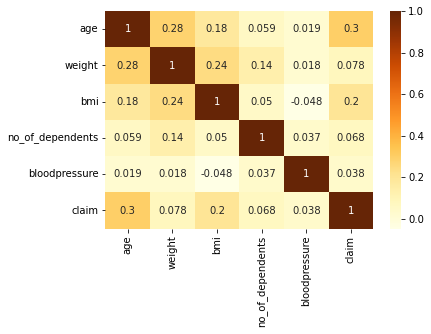

In [46]:
from scipy import stats
df.corr()
import seaborn as sns
corr = df.corr()
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot = True, cmap = 'YlOrBr')
plt.show()

In [ ]:
All the diagonals are 1 because they are correlating each variable to itself so its perfect correlation.The values which are greater than 0 or dark colors (according to heatmap) are positively correlated.Darker the color more positively it is correlated. The lighter colors or the values closer to -1 (or less than 0) are negatively correlated. Lighter the color more it is negatively correlated.

#### 5. There are 91 cities in the data, it means 91 unique cities. Drop this city column from the dataframe. We will not use it for prediction. (2m)

In [26]:
df = df.drop(['city'],axis=1)

## 6. Separating the variables. 

#### 6.1 Separate x and y. Store all the independent columns in df1. Store 'claim' in y. (2m)

In [27]:
df1 = df.loc[:,df.columns != 'claim']
y = df['claim']
df1

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title
0,60.0,male,64,24.3,NoDisease,1,0,72,0,0,Actor
1,49.0,female,75,22.6,NoDisease,1,0,78,1,1,Engineer
2,32.0,female,64,17.8,Epilepsy,2,1,88,1,1,Academician
3,61.0,female,53,36.4,NoDisease,1,1,72,1,0,Chef
4,19.0,female,50,20.6,NoDisease,0,0,82,1,0,HomeMakers
...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,male,49,28.3,NoDisease,1,1,54,1,0,FilmMaker
14996,39.0,male,74,29.6,NoDisease,4,0,64,1,0,Student
14997,20.0,male,62,33.3,NoDisease,0,0,52,1,0,FashionDesigner
14998,52.0,male,88,36.7,NoDisease,0,0,70,1,0,Farmer


#### 6.2 Separate numerical and categorical columns from df1 and store them Separately. (2m)

In [28]:
df1_cat = df1.select_dtypes(include='object')
df1_num = df1.select_dtypes(np.number)
df1_cat

,sex,hereditary_diseases,smoker,diabetes,regular_ex,job_title
0,male,NoDisease,0,0,0,Actor
1,female,NoDisease,0,1,1,Engineer
2,female,Epilepsy,1,1,1,Academician
3,female,NoDisease,1,1,0,Chef
4,female,NoDisease,0,1,0,HomeMakers
...,...,...,...,...,...,...
14995,male,NoDisease,1,1,0,FilmMaker
14996,male,NoDisease,0,1,0,Student
14997,male,NoDisease,0,1,0,FashionDesigner
14998,male,NoDisease,0,1,0,Farmer


#### 6.3 For all the categorical columns, plot thr countplot and write conclusions. (2m)

In [29]:
catcall=list(df1_cat.columns)
catcall

['sex', 'hereditary_diseases', 'smoker', 'diabetes', 'regular_ex', 'job_title']

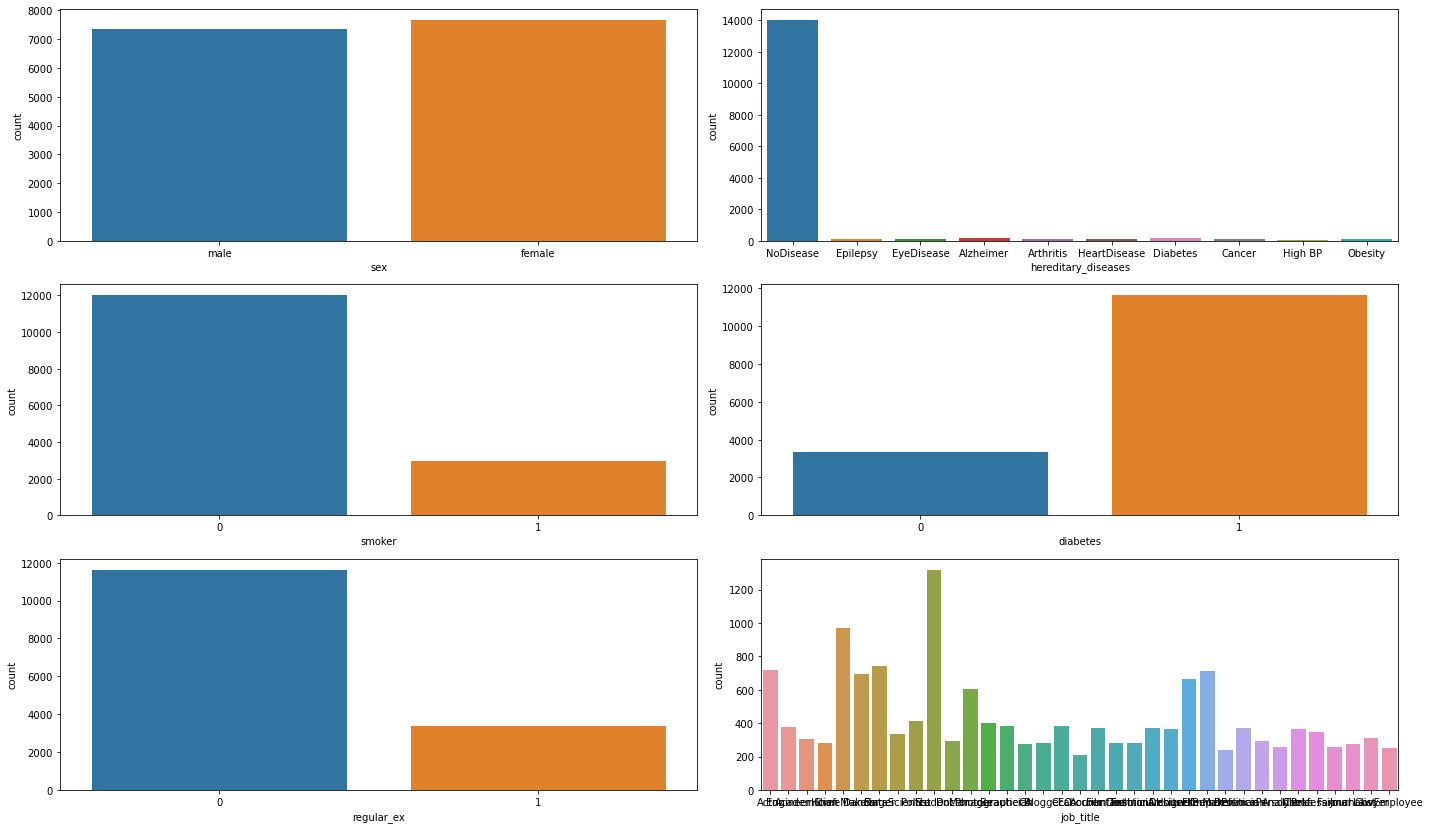

In [30]:

plt.figure(figsize=(20,15))
a=4
b=2
c=1
for i in df1_cat:
    plt.subplot(a,b,c)
    sns.countplot(df1_cat[i])
    plt.xlabel(i)
    c=c+1
plt.tight_layout()
plt.show()

In [ ]:
conclusion
Plot 1: Number of Male and Female are NEARLY equal.
Plot 2:Number of healthy patients are Nome
Plot 3: Number of non smoker are more
Plot 4: Diabetes patiemts are more
Plot 5: Most of the people do not exercise regularly.
Plot 6: Variable Job Profile

#### 6.4 For all the numerical columns, plot the boxplot and write conclusions. (2m)

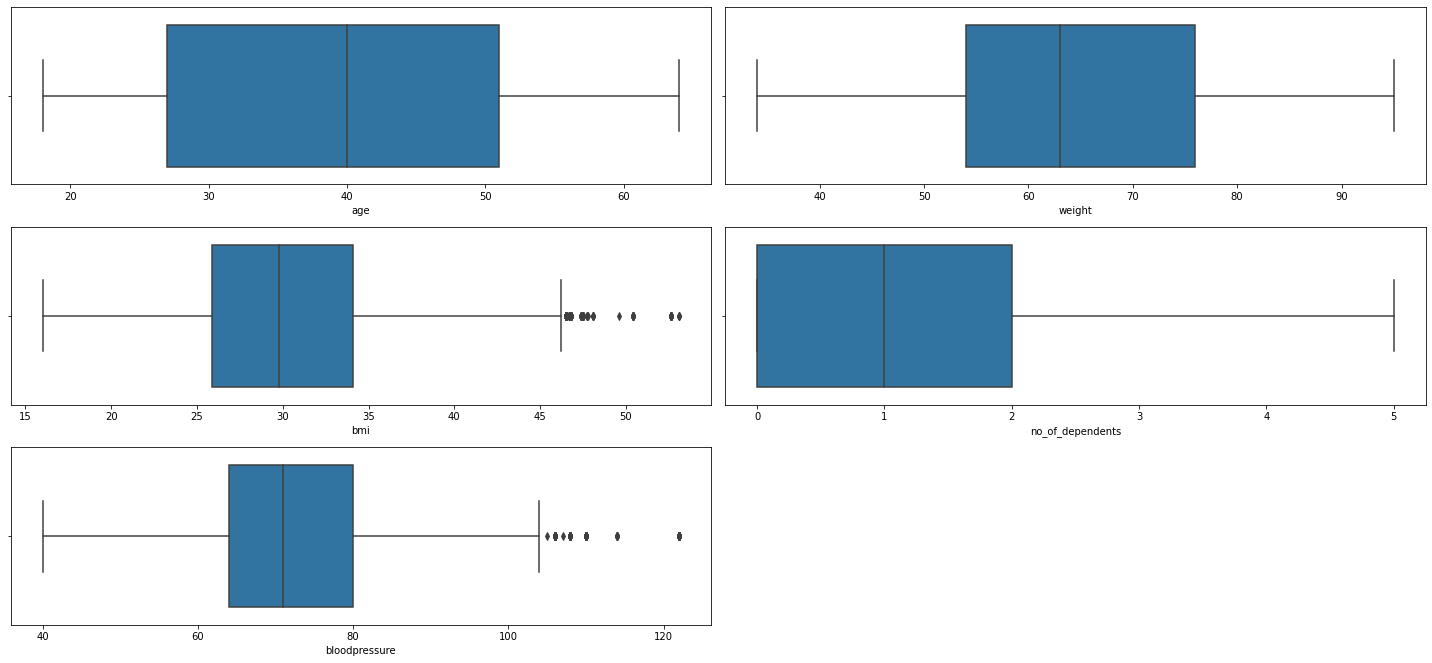

In [31]:

plt.figure(figsize=(20,15))
a=5
b=2
c=1
for i in df1_num:
    plt.subplot(a,b,c)
    sns.boxplot(df1_num[i])
    plt.xlabel(i)
    c=c+1
plt.tight_layout()
plt.show()

In [ ]:
the box represents the middle 50% of all the datapoints which represents the core region when the data is situated. The height of the boxplot is also called the Inter Quartile Range (IQR), which mathematically is the difference between the 75th and 25th percentile values of the data.

The thick line in the middle of the box represents the median. Whereas, the upper and lower whisker marks 1.5 times the IQR from the top (and bottom) of the box.
the points that lie outside the whiskers, that is, (1.5 x IQR) in both directions are generally considered as outliers.

#### 7. Check multicollinearity using VIF. (2m)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [33]:
df1_num.columns 




Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure'], dtype='object')

In [34]:
df1_num
df1_num.values

array([[60. , 64. , 24.3,  1. , 72. ],
       [49. , 75. , 22.6,  1. , 78. ],
       [32. , 64. , 17.8,  2. , 88. ],
       ...,
       [20. , 62. , 33.3,  0. , 52. ],
       [52. , 88. , 36.7,  0. , 70. ],
       [52. , 57. , 26.4,  3. , 72. ]])

In [35]:
df1_num.shape[1]

5

In [36]:

for i in range(df1_num.shape[1]):
  print(VIF(df1_num.values,i))

10.00652180506797
23.99420898251604
22.93796406155911
1.8840236251826636
20.819317809683668


In [37]:
VIF_values= [VIF(df1_num.values,i) for i in range(df1_num.shape[1])]
## dont consider for constant
VIF_values

[10.00652180506797,
 23.99420898251604,
 22.93796406155911,
 1.8840236251826636,
 20.819317809683668]

In [38]:

VIFdf = pd.DataFrame(VIF_values,columns=['VIF_val'],index=df1_num.columns)
VIFdf
VIFdfsort = VIFdf.sort_values('VIF_val',ascending = False)
VIFdfsort

,VIF_val
weight,23.994209
bmi,22.937964
bloodpressure,20.819318
age,10.006522
no_of_dependents,1.884024


## 8. Preprocessing,combining and splitting the data.


#### 8.1 Perform dummy Encoding for Categorical Variables. (2m)

In [39]:
cat_encoded = pd.get_dummies(df1_cat,drop_first=True)
cat_encoded.head()

,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,...,job_title_Journalist,job_title_Labourer,job_title_Lawyer,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### 8.2 Concatenate numerical and dummy encoded categorical variables. (2m)

In [40]:
z = pd.concat([df1_num,cat_encoded],axis=1)
z.head()

,age,weight,bmi,no_of_dependents,bloodpressure,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,...,job_title_Journalist,job_title_Labourer,job_title_Lawyer,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician
0,60.0,64,24.3,1,72,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,49.0,75,22.6,1,78,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,32.0,64,17.8,2,88,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,61.0,53,36.4,1,72,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,19.0,50,20.6,0,82,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 8.3 Split the data into training and test sets. Take test_size = 0.2. (2m)

In [41]:
 from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(z,y,test_size=0.2)

## 9 Fitting different models. 

#### 9.1 Fit Multiple Linear Regression, find out R2 for train as well as test data. (5m)

In [43]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


from sklearn.metrics import r2_score
y_train_predict = regr.predict(x_train)
R_square = r2_score(y_train, y_train_predict)

print('R2 score is ', R_square)



y_test_predict = regr.predict(x_test)
R_square = r2_score(y_test, y_test_predict)

print('R2 score is ', R_square)

Intercept: 
 1714.831808787827
Coefficients: 
 [ 2.65343770e+02 -3.75473612e+01  2.14620041e+02  4.51492708e+02
  2.70077410e+01 -7.86113975e+01 -2.32394637e+03  1.30465814e+02
 -1.50037592e+03 -7.44098618e+01  9.74734615e+01  4.14355738e+03
 -1.95077250e+03 -1.11721694e+04 -4.88649992e+02  2.02569799e+04
  1.28950172e+03 -8.42277987e+02  4.17835273e+02 -3.03583624e+02
 -1.63813091e+03  4.02511533e+02  5.60339950e+01 -8.04295564e+02
 -3.01274052e+02  3.85983973e+02  3.72349596e+02 -1.25137588e+03
  8.78522639e+02  1.19307832e+02  1.30923464e+03 -1.04029312e+03
  1.53019276e+03  1.83292184e+03  4.24656999e+02  1.69637495e+02
 -2.33052126e+02  7.30621508e+02 -2.94293983e+02  5.63242319e+02
 -5.53835003e+02  5.99353149e+01  8.01369349e+01  1.45061256e+03
  6.01429984e+02  1.07617310e+03  1.85234077e+03  1.36186562e+01
  1.27600369e+03  3.73207776e+02  9.60888991e+02 -5.00377127e+02]
R2 score is  0.7669627301796844
R2 score is  0.7584917235744583


#### 9.2 Perform hyperparameter tunning for the Ridge model. Take alpha = [0.001,0.01,0.1,0.3,0.5]. Fit the model with the best value of alpha. Compare Ridge R2 and normal R2 found out in 9.1 and conclude which model is best for the given data.  (5m)

In [44]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [45]:
from sklearn.model_selection import GridSearchCV
p = {'alpha':[0.001,0.01,0.1,0.3,0.5]}
r = Ridge(normalize=True) # to scale the data
gridcv = GridSearchCV(r,param_grid=p,cv=3,scoring='r2')  # k fold cross validation with k=3
gridcv.fit(x_train,y_train)
gridcv.best_params_

{'alpha': 0.001}